<a href="https://colab.research.google.com/github/hardikkamboj/App-reviews---Data-gathering-and-analysis/blob/main/visualizing_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import re
from textblob import TextBlob


stop_words = stopwords.words('english')
nltk.download('punkt')
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [54]:
df = pd.read_csv('/content/axis_merchant.csv')
print(df.shape)
df.head()

(383, 11)


,Unnamed: 0,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,0,gp:AOqpTOFVeaiZwKMk1YiPI5VbMaMDdz3afjdjeBD_ZKw...,Kunal Choksi,https://play-lh.googleusercontent.com/a-/AOh14...,Totally not satisfied with services. No respon...,1,17,1.1.8,2021-03-19 18:21:48,NaN,NaN
1,1,gp:AOqpTOFu1-It2xJ0WYiryKStQ3TUNHG9q31mwGI4oBu...,Chandrakant Ghangale,https://play-lh.googleusercontent.com/a-/AOh14...,Poor report/mis service. Can't change the date...,1,11,1.1.8,2021-03-28 21:28:32,NaN,NaN
2,2,gp:AOqpTOEZovnMWg8z6ynVs8mR3Qr_9WwnIWLy8_iMtSR...,Prakash Reddy,https://play-lh.googleusercontent.com/a-/AOh14...,"Not able to see transaction reports, showing n...",1,4,1.1.8,2021-05-09 09:16:17,NaN,NaN
3,3,gp:AOqpTOFmPJa1do5AVUJ4X5ZGwkzhx6OAeb8dJLtaJoJ...,sahil gupta,https://play-lh.googleusercontent.com/a/AATXAJ...,Good Job! Complaints are actually getting reso...,5,17,1.1.6,2018-12-12 12:18:10,"Dear Sahil, Thanks for the feedback. We will c...",2018-12-19 13:15:02
4,4,gp:AOqpTOF_fy773cE5sNtf0a0yy3sDqG24OFuzbpaz9vi...,R.Sharath kumar,https://play-lh.googleusercontent.com/a-/AOh14...,Feeling very irritated - Not able to login at ...,1,28,1.1.7.2,2020-08-20 16:28:56,NaN,NaN


In [55]:
df.isnull().sum()

Unnamed: 0                0
reviewId                  0
userName                  0
userImage                 0
content                   0
score                     0
thumbsUpCount             0
reviewCreatedVersion     84
at                        0
replyContent            278
repliedAt               278
dtype: int64

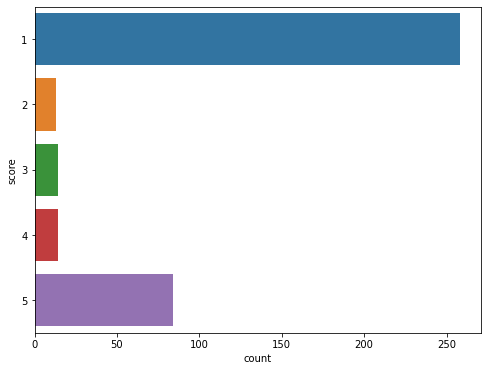

In [56]:
plt.figure(figsize = (8,6))
sns.countplot(y = df['score'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


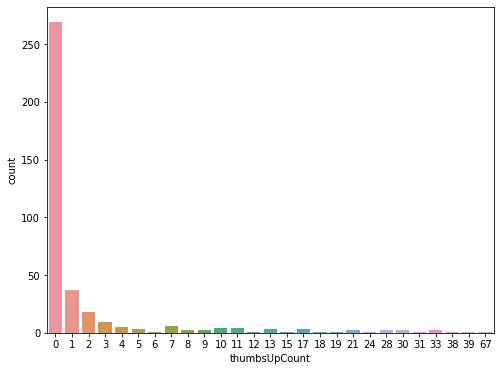

In [57]:
plt.figure(figsize = (8,6))
sns.countplot(df['thumbsUpCount'])

In [64]:
most_imp_comments = df.sort_values(by = 'thumbsUpCount',ascending=False)[['content','thumbsUpCount','score']][:10]

In [66]:
for _,cmt in most_imp_comments.iterrows():
  print('Upvoted by - ',cmt['thumbsUpCount'], ', score - ', cmt['score'])
  print(cmt['content'])
  print(' ')

Upvoted by -  67 , score -  1
Downloaded this app two weeks before but it is not activated till now.  It indicates your app will be activated in 24 hrs. Waste of time waiting for it. Even their staff doesn't know about this app. Enquired it with  about five persons of Axis bank staff regarding this. Nobody knows about it and no proper response.
 
Upvoted by -  39 , score -  1
This app works only when I call for help.  I Installed this app when i installed the  POS machine . THe machine works well but i cannot see the transactions on the app. Even after entering the correct mid and mPIN, it does not sign in and no response is shown on the app.  Dear Developers, Please do not upload such applications which are not fully working ( Testing Done ).  Please Do NOt RePly That YOU REGRET for the app's Misbehaviour... First Rectify the problem then contact or reply
 
Upvoted by -  38 , score -  1
i am facing issue from past one month and i called your employees for about 100 times but i didnt g

In [62]:
# data preprocessing / cleaning text 
df['cleaned_text'] = df['content'].apply(lambda x : ' '.join([lemmatizer.lemmatize(word.lower()) \
    for word in word_tokenize(re.sub(r'([^\s\w]|_)+', ' ', x)) if word.lower() not in stop_words]))

df['polarity'] = df['cleaned_text'].map(lambda text: TextBlob(text).sentiment.polarity)
df['review_len'] = df['cleaned_text'].astype(str).apply(len)
df['word_count'] = df['cleaned_text'].apply(lambda x: len(str(x).split()))

In [63]:
df.head()

,Unnamed: 0,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,cleaned_text,polarity,review_len,word_count
0,0,gp:AOqpTOFVeaiZwKMk1YiPI5VbMaMDdz3afjdjeBD_ZKw...,Kunal Choksi,https://play-lh.googleusercontent.com/a-/AOh14...,Totally not satisfied with services. No respon...,1,17,1.1.8,2021-03-19 18:21:48,NaN,NaN,totally satisfied service response service als...,0.330,67,9
1,1,gp:AOqpTOFu1-It2xJ0WYiryKStQ3TUNHG9q31mwGI4oBu...,Chandrakant Ghangale,https://play-lh.googleusercontent.com/a-/AOh14...,Poor report/mis service. Can't change the date...,1,11,1.1.8,2021-03-28 21:28:32,NaN,NaN,poor report mi service change date report stuc...,-0.400,86,14
2,2,gp:AOqpTOEZovnMWg8z6ynVs8mR3Qr_9WwnIWLy8_iMtSR...,Prakash Reddy,https://play-lh.googleusercontent.com/a-/AOh14...,"Not able to see transaction reports, showing n...",1,4,1.1.8,2021-05-09 09:16:17,NaN,NaN,able see transaction report showing data found...,0.550,72,11
3,3,gp:AOqpTOFmPJa1do5AVUJ4X5ZGwkzhx6OAeb8dJLtaJoJ...,sahil gupta,https://play-lh.googleusercontent.com/a/AATXAJ...,Good Job! Complaints are actually getting reso...,5,17,1.1.6,2018-12-12 12:18:10,"Dear Sahil, Thanks for the feedback. We will c...",2018-12-19 13:15:02,good job complaint actually getting resolved a...,0.225,190,27
4,4,gp:AOqpTOF_fy773cE5sNtf0a0yy3sDqG24OFuzbpaz9vi...,R.Sharath kumar,https://play-lh.googleusercontent.com/a-/AOh14...,Feeling very irritated - Not able to login at ...,1,28,1.1.7.2,2020-08-20 16:28:56,NaN,NaN,feeling irritated able login time facing diffe...,0.125,210,30


# Sentiment Analysis

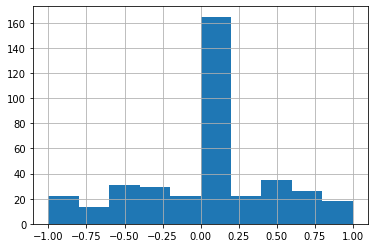

In [67]:
df['polarity'].hist()

<BarContainer object of 3 artists>

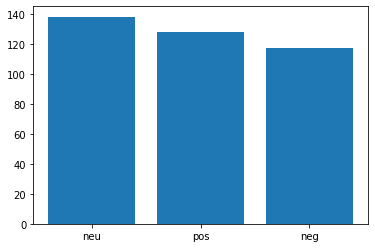

In [68]:
def sentiment(x):
    if x<0:
        return 'neg'
    elif x==0:
        return 'neu'
    else:
        return 'pos'
    
df['polarity_score']=df['polarity'].\
   map(lambda x: sentiment(x))

plt.bar(df.polarity_score.value_counts().index,
        df.polarity_score.value_counts())


## Some positive comments

In [69]:
df[df['polarity_score']=='pos']['content'].head()

0    Totally not satisfied with services. No respon...
2    Not able to see transaction reports, showing n...
3    Good Job! Complaints are actually getting reso...
4    Feeling very irritated - Not able to login at ...
8    very bed service , don't install edc machine, ...
Name: content, dtype: object

## Some Negative Comments

In [70]:
df[df['polarity_score']=='neg']['content'].head()

1    Poor report/mis service. Can't change the date...
5    Reports /MIS IS VERY POOR❗️ WE cant extract re...
6    Have been using a lot of Merchant Apps from di...
7    A lousy app. Been a merchant with axis almost ...
9    Very worst app I'm unebal to login ever time i...
Name: content, dtype: object

## Some Neutral Comments

In [71]:
df[df['polarity_score']=='neu']['content'].head()

12    I can't login. Always show message that mid wa...
18    Everytime I enter OTP, it just keep getting pr...
19    Best worst app, it take 2-3 years to see a rep...
26    This app never works properly....no proper ref...
28    It's not working at all. When m entered the MI...
Name: content, dtype: object

## Polarity by ratings

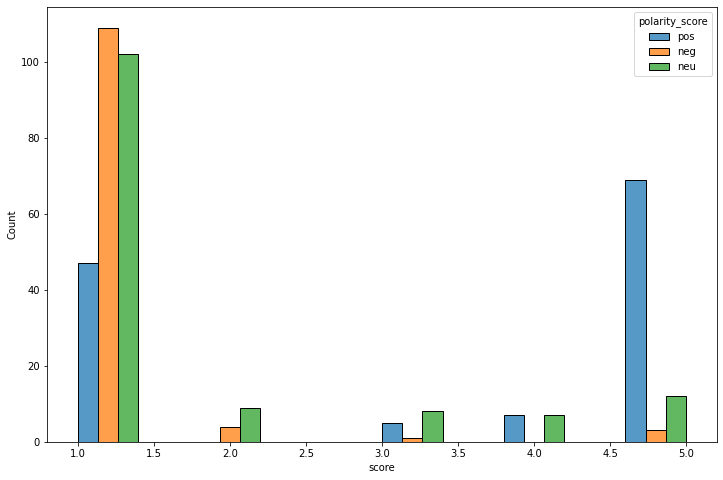

In [75]:
plt.figure(figsize = (12,8))
sns.histplot(data = df,x = 'score',hue = 'polarity_score',multiple="dodge")